In [1]:
from datetime import datetime
import pygem as gem
import numpy as np
from scipy.interpolate import interp1d
from time import time
#import utilities
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#import generator
import xml.etree.ElementTree as ET
from pricing import LocalVolatilityCurve
from read_market import MarketDataReader
from montecarlo import MC_Analisys, MC
import lets_be_rational.LetsBeRational as lbr
from pricing import LocalVolatilityCurve, EquityForwardCurve, ForwardVariance, DiscountingCurve,piecewise_function,Vanilla_PayOff,PricingModel,LV_model

In [2]:
reader = MarketDataReader("TV_example.xml")
correlation_matrix = reader.get_correlation()
N_equity = len(correlation_matrix)
names = reader.get_stock_names()
spot_prices = reader.get_spot_prices()
D = reader.get_discounts()
F = reader.get_forward_curves()
V = reader.get_volatilities()


zero interest rate time grid [0.00000000e+00 2.73972603e-03 5.47945205e-03 8.21917808e-03
 2.46575342e-02 4.38356164e-02 6.30136986e-02 9.31506849e-02
 1.72602740e-01 2.57534247e-01 3.42465753e-01 4.24657534e-01
 5.15068493e-01 5.91780822e-01 6.76712329e-01 7.31506849e-01
 7.53424658e-01 9.83561644e-01 1.00547945e+00 1.23287671e+00
 1.47945205e+00 1.72602740e+00 1.98082192e+00 2.01095890e+00
 2.23013699e+00 3.00821918e+00 4.00821918e+00 5.00821918e+00
 6.00821918e+00 7.00821918e+00 8.01369863e+00 9.01095890e+00
 1.00109589e+01 1.10109589e+01 1.20136986e+01 1.30191781e+01
 1.40164384e+01 1.50136986e+01 1.60164384e+01 1.70164384e+01
 1.80164384e+01 1.90219178e+01 2.00191781e+01 2.10191781e+01
 2.20191781e+01 2.30191781e+01 2.40273973e+01 2.50246575e+01
 2.60219178e+01 2.70219178e+01 2.80246575e+01 2.90246575e+01
 3.00301370e+01 3.10273973e+01 3.20273973e+01 3.30273973e+01
 3.40273973e+01 3.50273973e+01 3.60328767e+01 3.70301370e+01
 3.80301370e+01 3.90301370e+01 4.00328767e+01 5.00383562

 3.47945205 4.49589041 4.57260274 5.56986301]
Forward volatility:  [0.23322252 0.24209823 0.25181046 0.24987572 0.22098048 0.22660849
 0.21462688 0.20123583 0.21178323 0.20566381 0.19995376 0.20156554
 0.21512117 0.24636786 0.26956897 0.27118546]
Forward volatility time grid:  [0.         0.06575342 0.16164384 0.23835616 0.56438356 0.7369863
 0.98630137 1.58082192 1.98356164 2.57808219 3.57534247 4.57260274
 5.56986301]
Forward volatility:  [0.21636903 0.21553394 0.21463342 0.21245637 0.21090235 0.20975708
 0.20455645 0.21500877 0.21757001 0.22630644 0.22001057 0.22090106
 0.21712811]
Forward volatility time grid:  [0.         0.24657534 1.2630137  2.26027397 3.25753425 4.25479452]
Forward volatility:  [0.14312087 0.14841947 0.14898182 0.1481     0.1481     0.1481    ]
Forward volatility time grid:  [0.         0.06575342 0.16164384 0.23835616 0.48767123 0.7369863
 0.98630137 1.48493151 1.98356164 2.48219178 3.47945205 4.49589041
 5.49315068 6.49041096 7.48767123]
Forward volatility:  

In [8]:
%%time
for i in range(9):
    tree = ET.parse('calibration_output.xml')
    root = tree.getroot()
    N_equity = i
    name=root[1][2][1][0][N_equity].text
    print(name)
    expiry_yrf = 4
    n_expiries = len(root[1][2][2][N_equity][expiry_yrf][0])#.attrib
    expiries = np.array([])
    for i in range(n_expiries):
        expiries = np.append(expiries,float(root[1][2][2][N_equity][expiry_yrf][0][i].text))

    moneyness = 6
    moneyness_matrix = np.array([])
    n_matrix =len(root[1][2][2][N_equity][moneyness][0])
    n_strikes = int(n_matrix/n_expiries)
    for i in range(n_matrix):
        moneyness_matrix = np.append(moneyness_matrix,float(root[1][2][2][N_equity][moneyness][0][i].text))
    moneyness_matrix = moneyness_matrix.reshape(n_strikes,n_expiries)
    vola = 7
    vola_matrix = np.array([])
    for i in range(n_matrix):
        vola_matrix = np.append(vola_matrix,float(root[1][2][2][N_equity][vola][0][i].text))
    vola_matrix = vola_matrix.reshape(n_strikes,n_expiries)
    LV_curve = LocalVolatilityCurve(vola_matrix,moneyness_matrix,expiries,name)
    idx = np.where(names==name)[0][0]
    print(name)
    forward = F[idx]
    print(names[idx])
    N_grid = 300
    model = LV_model(fixings=expiries, local_vol_curve=LV_curve, forward_curve=forward, N_grid = N_grid)
    N_simulation = 5e5
    logX_t = model.simulate(random_gen = np.random, Nsim=N_simulation, normalization=1)
    np.save(name+"_LV"+str(N_grid), logX_t)

DJ 50 TR
DJ 50 TR
DJ 50 TR
Simulation finished for 1 of 10
Simulation finished for 2 of 10
Simulation finished for 3 of 10
Simulation finished for 4 of 10
Simulation finished for 5 of 10
Simulation finished for 6 of 10
Simulation finished for 7 of 10
Simulation finished for 8 of 10
Simulation finished for 9 of 10
Simulation finished for 10 of 10
S&P 500 NET EUR
S&P 500 NET EUR
S&P 500 NET EUR
Simulation finished for 1 of 8
Simulation finished for 2 of 8
Simulation finished for 3 of 8
Simulation finished for 4 of 8
Simulation finished for 5 of 8
Simulation finished for 6 of 8
Simulation finished for 7 of 8
Simulation finished for 8 of 8
MSCI EM MKT EUR
MSCI EM MKT EUR
MSCI EM MKT EUR
Simulation finished for 1 of 8
Simulation finished for 2 of 8
Simulation finished for 3 of 8
Simulation finished for 4 of 8
Simulation finished for 5 of 8
Simulation finished for 6 of 8
Simulation finished for 7 of 8
Simulation finished for 8 of 8
I NKY NTR EUR
I NKY NTR EUR
I NKY NTR EUR
Simulation finishe

In [5]:
tree = ET.parse('calibration_output.xml')
root = tree.getroot()
N_equity = 8
name=root[1][2][1][0][N_equity].text
print(name)
expiry_yrf = 4
n_expiries = len(root[1][2][2][N_equity][expiry_yrf][0])#.attrib
expiries = np.array([])
for i in range(n_expiries):
    expiries = np.append(expiries,float(root[1][2][2][N_equity][expiry_yrf][0][i].text))

moneyness = 6
moneyness_matrix = np.array([])
n_matrix =len(root[1][2][2][N_equity][moneyness][0])
n_strikes = int(n_matrix/n_expiries)
for i in range(n_matrix):
    moneyness_matrix = np.append(moneyness_matrix,float(root[1][2][2][N_equity][moneyness][0][i].text))
moneyness_matrix = moneyness_matrix.reshape(n_strikes,n_expiries)

vola = 7
vola_matrix = np.array([])
for i in range(n_matrix):
    vola_matrix = np.append(vola_matrix,float(root[1][2][2][N_equity][vola][0][i].text))
vola_matrix = vola_matrix.reshape(n_strikes,n_expiries)
LV_curve = LocalVolatilityCurve(vola_matrix,moneyness_matrix,expiries,name)

HSI NTR EUR


In [39]:
idx = np.where(names==name)[0][0]

In [40]:
F = F[idx]
V = V[idx]
names[idx]

'MSCI EM MKT EUR'

0,1,2,3,il 4 è sbagliato il nome perchè corrisponde al DAX 30 E, il 5 è sbagliato il nome perchè corrisponde a FTSE100, il 6 è sbagliato perchè corrisponde a SMI TR EUR  

In [41]:
spot_volatilities = V.matrix.T
vola_strikes = V.K
maturities = V.T
money_ness = np.zeros((len(vola_strikes),len(maturities)))
for j in range(len(vola_strikes)):
    for i in range(len(maturities)):
        money_ness[j,i] = vola_strikes[j]/F(maturities[i])
IV_curve = LocalVolatilityCurve(spot_volatilities,money_ness,maturities,name)

In [42]:
N_grid = 300
model = LV_model(fixings=expiries, local_vol_curve=LV_curve, forward_curve=F, N_grid = N_grid)

In [43]:
%%time
N_simulation = 5e5
logX_t = model.simulate(random_gen = np.random, Nsim=N_simulation, normalization=1)

Simulation finished for 1 of 8
Simulation finished for 2 of 8
Simulation finished for 3 of 8
Simulation finished for 4 of 8
Simulation finished for 5 of 8
Simulation finished for 6 of 8
Simulation finished for 7 of 8
Simulation finished for 8 of 8
Wall time: 11min 21s


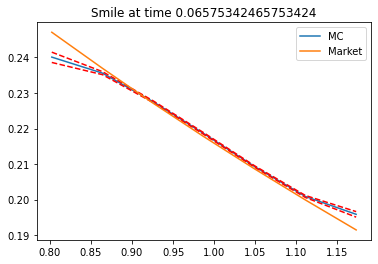

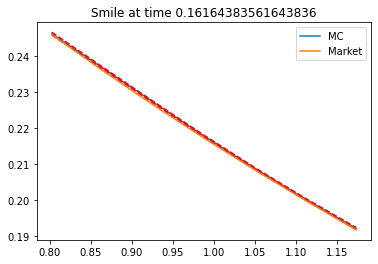

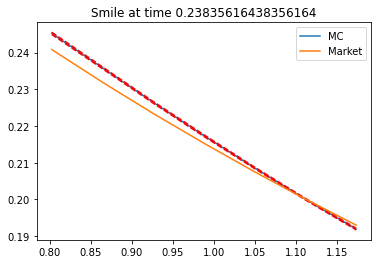

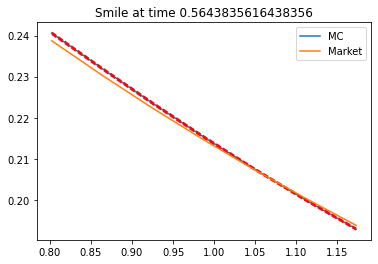

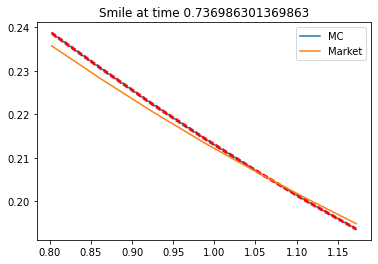

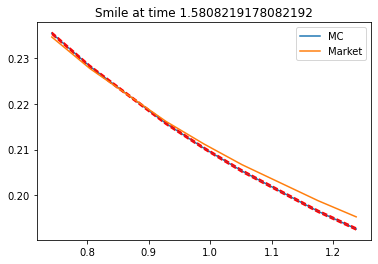

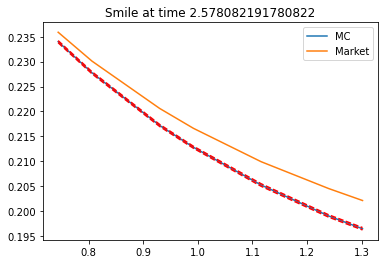

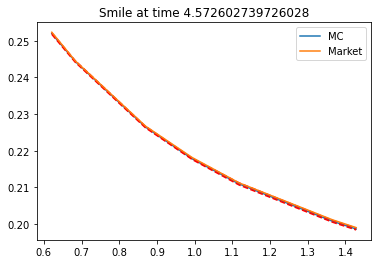

Wall time: 52.9 s


In [44]:
%%time
kind = 1
imp_volatility = np.zeros((n_strikes,n_expiries))
imp_volatility_plus = np.zeros((n_strikes,n_expiries))
imp_volatility_minus = np.zeros((n_strikes,n_expiries))
X_t = np.exp(logX_t)
for j in range(n_expiries):
    for i in range(n_strikes):
        k = moneyness_matrix[i,j]
        forward = F(expiries[j])
        K = forward*k
        if K >= forward:
            kind = 1  #1 buono
        elif K<forward:
            kind = -1  #-1 buono
        option = Vanilla_PayOff(St=X_t, strike=k,typo=kind)
        result, err_result = MC(option)
        imp_volatility[i,j] = lbr.implied_volatility_from_a_transformed_rational_guess(result[j],1.,k,expiries[j],kind)
        imp_volatility_plus[i,j] = lbr.implied_volatility_from_a_transformed_rational_guess(result[j]+err_result[j],1.,k,expiries[j],kind)
        imp_volatility_minus[i,j] = lbr.implied_volatility_from_a_transformed_rational_guess(result[j]-err_result[j],1.,k,expiries[j],kind)
    idx = j
    this_moneyness = moneyness_matrix[:,idx]
    plt.plot(this_moneyness, imp_volatility[:,idx], label='MC')
    plt.plot(this_moneyness,imp_volatility_plus[:,idx], 'r--')
    plt.plot(this_moneyness, imp_volatility_minus[:,idx], 'r--')
    plt.plot(this_moneyness,IV_curve(expiries[j],np.log(this_moneyness)),label='Market')
    plt.title('Smile at time {}'.format(expiries[j]))
    plt.legend()
    plt.show()


In [27]:
np.save(name+"_LV"+str(N_grid), logX_t)

In [42]:
expiries

array([0.24657534, 1.2630137 ])

In [43]:
maturities

array([0.24657534, 1.2630137 , 2.26027397, 3.25753425, 4.25479452,
       5.25205479])